In [44]:
import torch
import torch.nn as nn
import pandas as pd
import random
import matplotlib.pyplot as plt

In [45]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

In [46]:
generate_real()

tensor([0.8869, 0.0056, 0.8531, 0.1393])

In [47]:
class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)
        
        self.counter += 1
        if self.counter%10 == 0:
            self.progress.append(loss.item())
            pass
        if self.counter%10000 == 0:
            print("counter = ", self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    pass

In [48]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [49]:
D = Discriminator()

for i in range(10000):
    # 真实数据
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # 随机数据
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass
D.plot_progress()

counter =  10000


In [ ]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

        pass

    def train(self, D, inputs, targets):
        # 计算网络输出
        g_output = self.forward(inputs)

        # 输入鉴别器
        d_output = D.forward(g_output)

        # 计算损失值
        loss = D.loss_function(d_output, targets)

        # 每训练10次增加计数器
        self.counter += 1
        if self.counter%10 == 0:
            self.progress.append(loss.item())
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    pass


In [ ]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.5267, 0.6409, 0.4680, 0.5420], grad_fn=<SigmoidBackward>)

### <center>训练GAN</center>

In [ ]:
%%time

# 创建鉴别器和生成器

D = Discriminator()
G = Generator()

# 训练鉴别器和生成器

for i in range(10000):
    # 用真实样本训练鉴别器
    D.train(generate_real(), torch.FloatTensor([1.0]))

    # 用生成样本训练鉴别器
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    # 训练生成器
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

    pass

counter =  10000
counter =  20000
Wall time: 9.59 s


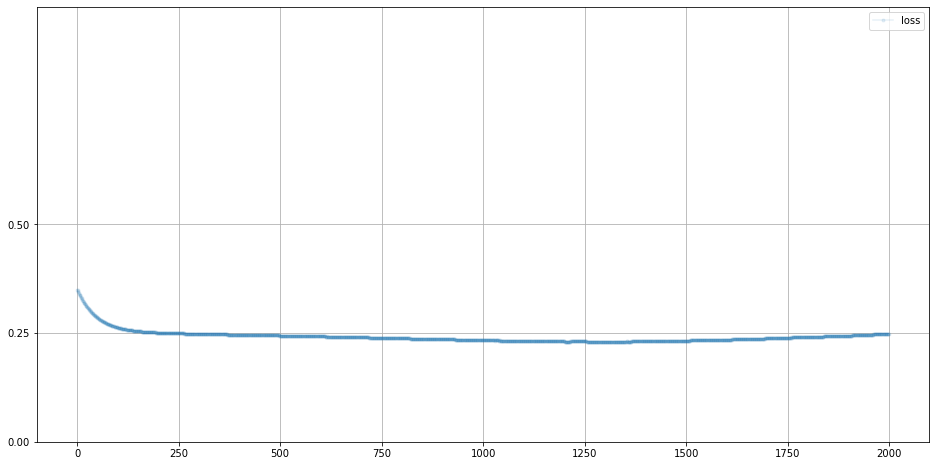

In [ ]:
D.plot_progress()

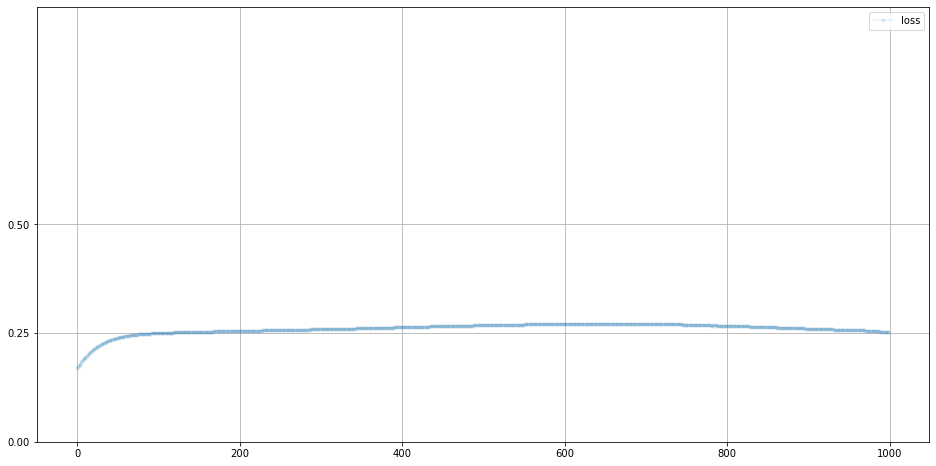

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.8692, 0.0885, 0.9002, 0.1478], grad_fn=<SigmoidBackward>)